## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('Iris.csv', index_col=False)

In [3]:
df.drop('Id', axis=1, inplace=True)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
setosa = df[df.Species == 'Iris-setosa']
versicolor = df[df.Species == 'Iris-versicolor']
virginica = df[df.Species == 'Iris-virginica']

## Visual EDA

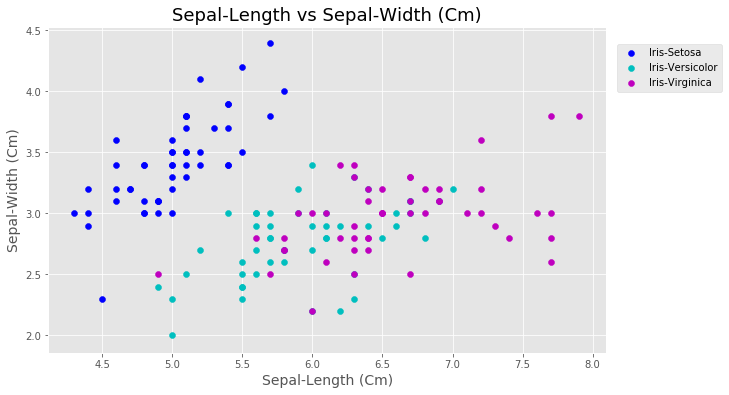

In [9]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], c = 'b', label = 'Iris-Setosa')
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], c = 'c', label = 'Iris-Versicolor')
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], c = 'm', label = 'Iris-Virginica')
plt.xlabel('Sepal-Length (Cm)', fontsize = 14)
plt.ylabel('Sepal-Width (Cm)', fontsize = 14)
plt.title('Sepal-Length vs Sepal-Width (Cm)', fontsize = 18)
plt.legend(loc = (1.02, 0.8))
plt.show()

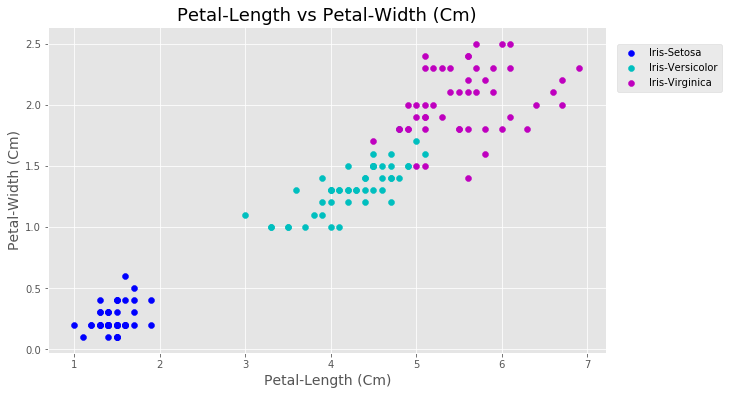

In [10]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], c = 'b', label = 'Iris-Setosa')
plt.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], c = 'c', label = 'Iris-Versicolor')
plt.scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], c = 'm', label = 'Iris-Virginica')
plt.xlabel('Petal-Length (Cm)', fontsize = 14)
plt.ylabel('Petal-Width (Cm)', fontsize = 14)
plt.title('Petal-Length vs Petal-Width (Cm)', fontsize = 18)
plt.legend(loc = (1.02, 0.8))
plt.show()

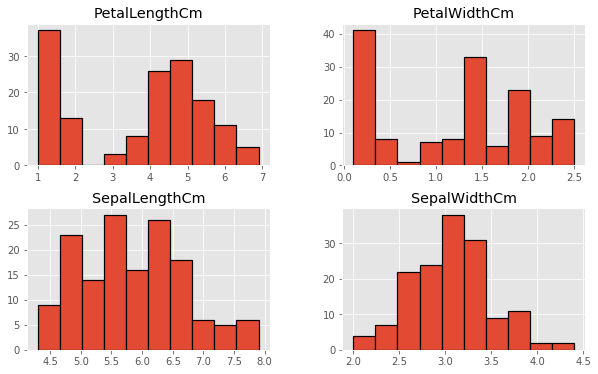

In [11]:
df.hist(edgecolor = 'black', linewidth = 1.2)
plt.gcf().set_size_inches(10, 6)
plt.show()

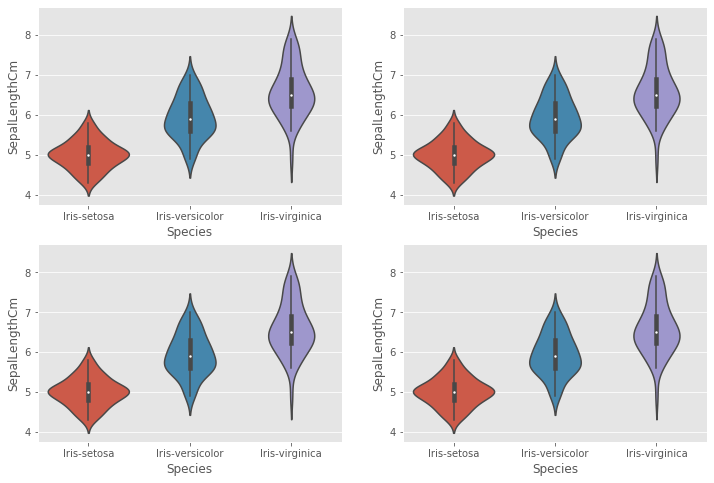

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.show()

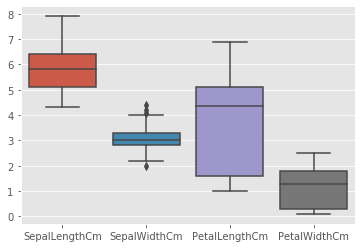

In [13]:
sns.boxplot(data=df)
plt.show()

In [14]:
df.shape

(150, 5)

## Train Test Split

In [15]:
X = df.drop('Species', axis = 1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

## Feature Selection

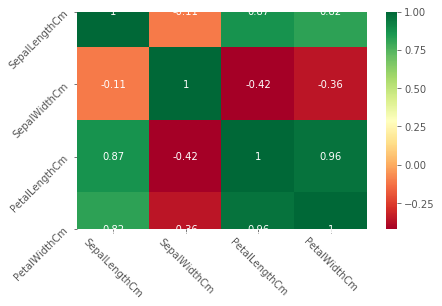

In [16]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn', square=True)
plt.yticks(rotation = 45)
plt.xticks(rotation = -45)
plt.show()

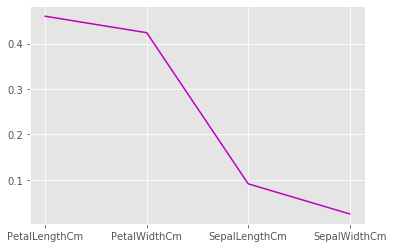

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X, y)
imp_features = pd.Series(model.feature_importances_, index = X.columns).sort_values(ascending=False)
# print(imp_features)
plt.plot(imp_features, color = 'm')
plt.show()

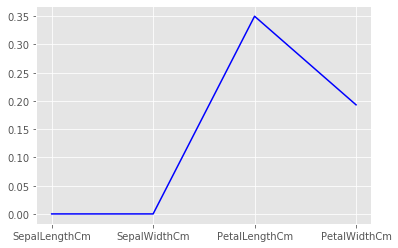

<Figure size 504x288 with 0 Axes>

In [41]:
from sklearn.preprocessing import LabelEncoder
g = y.copy()
le = LabelEncoder().fit(g)
# print(le.classes_)
encoded_y = le.transform(g)
from sklearn.linear_model import LassoCV
names = X.columns
lasso = LassoCV(cv=3)
features = lasso.fit(X, encoded_y).coef_
plt.plot(features, color = 'blue')
plt.xticks(range(len(names)), names, rotation = 0)
plt.figure(figsize=(7,4))
plt.show()

## Checking Accuracy of Each Model

In [63]:
accuracy = []
error = []
classifiers = ['Linear_SVC', 'Radial_SVC', 'KNN', 'Logistic_Regression', 'Decision_Tree', 'Random_Forest']
models = [SVC(gamma='scale', kernel='linear'), SVC(gamma='auto', kernel='rbf'), KNeighborsClassifier(n_neighbors=5), 
         LogisticRegression(solver='liblinear', multi_class='auto'), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_pred, y_test))
    y_pred_encoded = LabelEncoder().fit_transform(y_pred)
    y_test_encoded = LabelEncoder().fit_transform(y_test)
    error.append(np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded)))
d = {'Accuracy' : accuracy, 'RMSE' : error}
score = pd.DataFrame(d, index = classifiers)
score

,Accuracy,RMSE
Linear_SVC,1.000000,0.000000
Radial_SVC,0.977778,0.149071
KNN,0.977778,0.149071
Logistic_Regression,0.911111,0.298142
Decision_Tree,0.911111,0.298142
Random_Forest,0.888889,0.333333


## Hyper-Parameter Tuning (KNN)

In [65]:
param_grid = {'n_neighbors' : np.arange(1, 51)}
knn_model = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_model, param_grid, cv = 5, scoring='accuracy')
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 6}
0.98


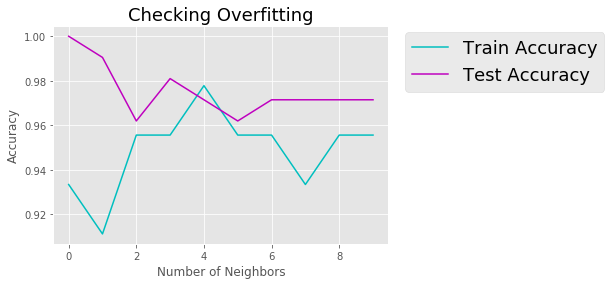

<Figure size 864x432 with 0 Axes>

In [21]:
neighbors = np.arange(1, 11)
test_accuracy = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_accuracy[i] = model.score(X_train, y_train)
    train_accuracy[i] = model.score(X_test, y_test)
plt.plot(train_accuracy, label='Train Accuracy', color = 'c')
plt.plot(test_accuracy, label='Test Accuracy', color = 'm')
plt.title('Checking Overfitting', fontsize = 18)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(fontsize=18, loc = (1.05, 0.7))
plt.figure(figsize=(12,6))
plt.show()

## Choosing Radial_SVC

In [22]:
model = SVC(gamma='auto', kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Root Mean Square Error: {mean_squared_error(y_test_encoded, y_pred_encoded)}')
print(f'Model Accuracy: {round(metrics.accuracy_score(y_test, y_pred), 3) * 100}%')

Root Mean Square Error: 0.1111111111111111
Model Accuracy: 97.8%


## Creating pipeline

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
steps = [('model', SVC(kernel='rbf', gamma = 'auto'))]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


## Saving the Model

In [105]:
import joblib
#save the model
joblib.dump(pipeline, 'iris_model.pkl')
new_model = joblib.load('iris_model.pkl')
new_model.fit(X_train, y_train)
new_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777
